In [37]:
from gwpy.timeseries import TimeSeries
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Make some Gaussian noise
data=TimeSeries(random.normal(size=256*4096),sample_rate=256)

When applying an FIR filter, the resulting data is corrupted by the length of the filter at any boundary. For a zero-phase filter, this means that the result is corrupted by half the impulse response at either end. So when applying e.g. a whitening filter, either the filter (in this case the inverse ASD) must be transformed to the TD and carefully truncated, or the FFTs used to apply the filter must be longer than the FFT of the filter and the overlap must cover all of the corrupted data.

In [38]:
# A boring ASD for testing
myasd1=3.+linspace(0.,1.,1+128*16)**2

In [39]:
# Whiten with no overlap
wdata1=data.whiten(16,0,window='hann',asd=myasd1)

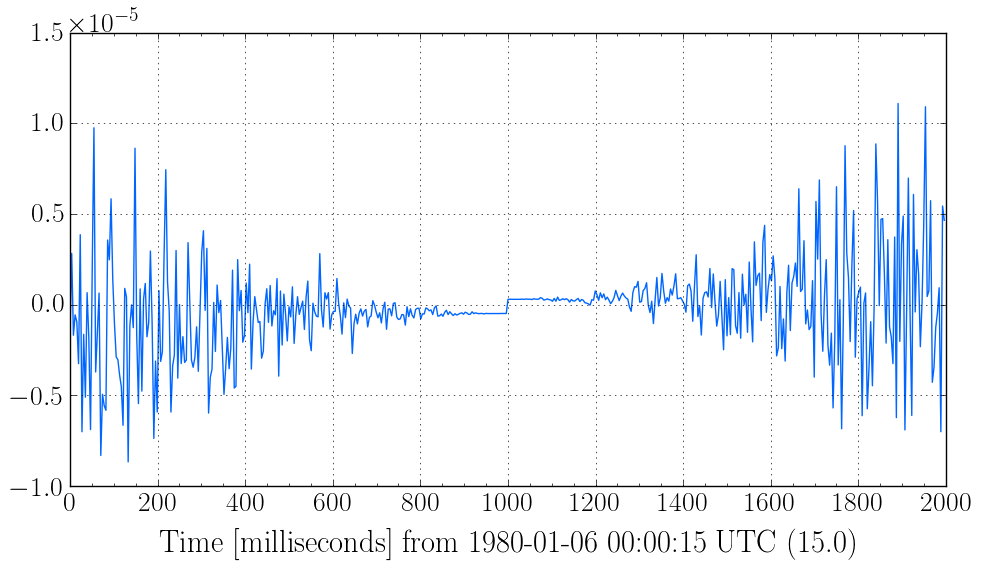

In [41]:
p1=wdata1[256*(16-1):256*(16+1)].plot()

In [49]:
# An ASD with a narrow feature
myasd2=3.+linspace(0.,1.,1+128*16)**2
myasd2[16*30:16*32]*=linspace(-1.,1.,16*2)**2

In [50]:
# Whiten with overlap
wdata2=data.whiten(16,4,window='hann',asd=myasd2)

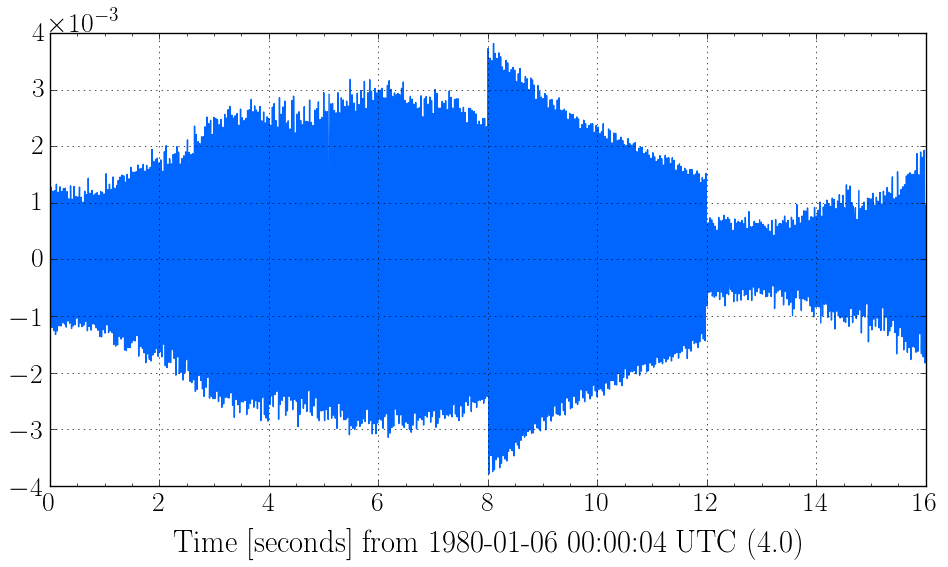

In [51]:
p2=wdata2[256*(16-4-8):256*(16-4+8)].plot()